In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


#read dataset

credit_card = pd.read_csv('AER_credit_card_data.csv')
credit_card

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


- ##### card :- was the application for a credit card accepted?
- ##### reports :- negative marks on a person's credit history .numeric(count)
- ##### age :- age is stored as a fractional value. numeric
- ##### income :- yearly income. numeric
- ##### share:- Ratio of monthly credit carrd expenditure to income . numeric
- ##### expenditure:- How much momney , on average , the applicant spends for month on credit cards . numeric
- ##### owner:- owning a home is usually seen as a sign of stability . categorical
- ##### selfemp:- self employed applicants may be seen as riskier since income can be unastable . categorical
- ##### dependants:- number of people financially dependent on the applicant . numeric
- ##### months:- how long the applicant has stayed in their current address , stability indicator : longer stay = lower risk . numeric
- ##### majorcards:- how many big credit cards (visa, mastercard , amex) applicant already owns , having yoo many indicate risk ofexperience with credit . numeric
- ##### active:- total number of active credit accounts , it can show the financial exposure . numeric 

#### summary of the dataset

- ##### using the .info() method to get summary of the dataset
- ##### using the .describe() method to get descriptive statistics of columns
- ##### using the .head() method to get first n number of rows
- ##### using the .columns method to get column headers,data_type

In [32]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [33]:
credit_card.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [34]:
credit_card['income'].describe()

count    1319.000000
mean        3.365376
std         1.693902
min         0.210000
25%         2.243750
50%         2.900000
75%         4.000000
max        13.500000
Name: income, dtype: float64

In [35]:
credit_card['card'].describe()

count     1319
unique       2
top        yes
freq      1023
Name: card, dtype: object

In [36]:
credit_card['owner'].describe()

count     1319
unique       2
top         no
freq       738
Name: owner, dtype: object

In [37]:
credit_card['active'].describe()

count    1319.000000
mean        6.996967
std         6.305812
min         0.000000
25%         2.000000
50%         6.000000
75%        11.000000
max        46.000000
Name: active, dtype: float64

In [38]:
credit_card['age'].describe()

count    1319.000000
mean       33.213103
std        10.142783
min         0.166667
25%        25.416670
50%        31.250000
75%        39.416670
max        83.500000
Name: age, dtype: float64

In [39]:
credit_card.head(20)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


#### Data cleaning
- ##### Using .isnull to find the absence of the value
- ##### Using .dropduplicates to remove the repeated rows or values from a dataframe/series
- ##### outliers used for ant data points that lie far away from most other values in the dataset
- ##### using .unique is to find any data that is missing , wrong , corrupted , or doesn't follow rules

In [40]:
credit_card.isnull()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,False,False,False,False,False,False,False,False,False,False,False,False
1315,False,False,False,False,False,False,False,False,False,False,False,False
1316,False,False,False,False,False,False,False,False,False,False,False,False
1317,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
credit_card['expenditure'].unique()

array([1.249833e+02, 9.854167e+00, 1.500000e+01, 1.378692e+02,
       5.465033e+02, 9.199667e+01, 4.083333e+01, 1.507900e+02,
       7.778217e+02, 5.258000e+01, 2.566642e+02, 0.000000e+00,
       7.887417e+01, 4.261500e+01, 3.354350e+02, 2.487192e+02,
       5.480350e+02, 4.333917e+01, 2.185200e+02, 1.706408e+02,
       3.758333e+01, 5.022017e+02, 7.317667e+01, 1.532773e+03,
       4.269083e+01, 4.178350e+02, 5.527242e+02, 2.225392e+02,
       5.412958e+02, 5.687742e+02, 3.444708e+02, 4.053517e+02,
       3.109375e+02, 5.364500e+01, 6.391667e+01, 1.658550e+02,
       9.583333e+00, 3.194900e+02, 8.308334e+01, 6.448283e+02,
       9.319750e+01, 1.050450e+02, 3.412500e+01, 4.118917e+01,
       1.698883e+02, 1.898033e+03, 8.103917e+02, 3.277500e+01,
       9.579916e+01, 2.778000e+01, 2.150692e+02, 7.951083e+01,
       3.060317e+02, 1.045358e+02, 6.424742e+02, 3.080492e+02,
       1.863533e+02, 5.614917e+01, 1.293733e+02, 9.310667e+01,
       2.926633e+02, 9.846416e+01, 2.585492e+02, 1.0168

In [42]:
credit_card['expenditure'].isnull().sum()

np.int64(0)

In [100]:
credit_card['expenditure'] = credit_card['expenditure'].round(2)
print(credit_card['expenditure'].map(lambda x: f"{x:.2f}"))

0       124.98
1         9.85
2        15.00
3       137.87
4       546.50
         ...  
1314      7.33
1315      0.00
1316    101.30
1317     27.00
1318    344.16
Name: expenditure, Length: 1319, dtype: object


In [46]:
credit_card['income'].isnull().sum()

np.int64(0)

In [47]:
credit_card['age'].unique()

array([37.66667  , 33.25     , 33.66667  , 30.5      , 32.16667  ,
       23.25     , 27.91667  , 29.16667  , 37.       , 28.41667  ,
       42.       , 30.       , 28.83333  , 35.33333  , 41.16667  ,
       40.08333  , 29.5      , 39.5      , 45.75     , 35.25     ,
       25.16667  , 34.25     , 35.75     , 42.66667  , 30.25     ,
       21.66667  , 22.25     , 40.       , 21.83333  , 29.41667  ,
       24.91667  , 21.       , 23.83333  , 42.83333  , 42.58333  ,
       36.58333  , 26.75     , 27.75     , 26.25     , 23.33333  ,
       29.91667  , 38.33333  , 28.16667  , 35.58333  , 37.75     ,
       26.08333  , 49.75     , 24.25     , 20.66667  , 23.75     ,
       25.75     , 32.91667  , 34.33333  , 44.66667  , 21.16667  ,
       25.08333  , 27.16667  , 26.41667  , 22.       , 27.33333  ,
       26.16667  , 40.75     , 42.08333  , 24.66667  , 30.75     ,
       27.41667  , 33.       , 37.33333  , 26.58333  , 24.33333  ,
       25.25     ,  0.5      , 32.83333  , 32.75     , 54.5833

In [48]:
credit_card['age'].isnull().sum()

np.int64(0)

In [49]:
credit_card['age'] = credit_card['age'].astype(int)
print(credit_card['age'].unique())

[37 33 30 32 23 27 29 28 42 35 41 40 39 45 25 34 21 22 24 36 26 38 49 20
 44  0 54 19 53 43 46 31 18 50 71 48 47 62 61 56 51 83 65 57 63 52 60 66
 74 55 64 59 58 80 67 69]


In [50]:
credit_card['age'] = credit_card['age'].replace(0, 33)
credit_card['income']=credit_card['income'].astype(int)
credit_card['income'] = credit_card['income'] * 1000
credit_card.head(10)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37,4000,0.033270,124.98,yes,no,3,54,1,12
1,yes,0,33,2000,0.005217,9.85,no,no,3,34,1,13
2,yes,0,33,4000,0.004156,15.00,yes,no,4,58,1,5
3,yes,0,30,2000,0.065214,137.87,no,no,0,25,1,7
4,yes,0,32,9000,0.067051,546.50,yes,no,2,64,1,5
5,yes,0,23,2000,0.044438,92.00,no,no,0,54,1,1
6,yes,0,27,3000,0.012576,40.83,no,no,2,7,1,5
7,yes,0,29,2000,0.076434,150.79,yes,no,0,77,1,3
8,yes,0,37,3000,0.245628,777.82,yes,no,0,97,1,6
9,yes,0,28,3000,0.019780,52.58,no,no,0,65,1,18


In [51]:
print(credit_card['age'].unique())
credit_card.head(10)

[37 33 30 32 23 27 29 28 42 35 41 40 39 45 25 34 21 22 24 36 26 38 49 20
 44 54 19 53 43 46 31 18 50 71 48 47 62 61 56 51 83 65 57 63 52 60 66 74
 55 64 59 58 80 67 69]


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37,4000,0.033270,124.98,yes,no,3,54,1,12
1,yes,0,33,2000,0.005217,9.85,no,no,3,34,1,13
2,yes,0,33,4000,0.004156,15.00,yes,no,4,58,1,5
3,yes,0,30,2000,0.065214,137.87,no,no,0,25,1,7
4,yes,0,32,9000,0.067051,546.50,yes,no,2,64,1,5
5,yes,0,23,2000,0.044438,92.00,no,no,0,54,1,1
6,yes,0,27,3000,0.012576,40.83,no,no,2,7,1,5
7,yes,0,29,2000,0.076434,150.79,yes,no,0,77,1,3
8,yes,0,37,3000,0.245628,777.82,yes,no,0,97,1,6
9,yes,0,28,3000,0.019780,52.58,no,no,0,65,1,18


In [52]:
credit_card['share'].unique()

array([0.03326991, 0.00521694, 0.00415556, ..., 0.02651261, 0.00899892,
       0.1116186 ])

In [53]:
credit_card['share'] = credit_card['share'].apply(lambda x: f"{x*100:.2f}%")
print(credit_card['share'].unique())


['3.33%' '0.52%' '0.42%' '6.52%' '6.71%' '4.44%' '1.26%' '7.64%' '24.56%'
 '1.98%' '7.80%' '0.06%' '0.07%' '3.88%' '2.69%' '12.58%' '7.48%' '0.04%'
 '6.58%' '2.24%' '13.11%' '5.12%' '0.89%' '13.37%' '0.03%' '5.86%' '0.05%'
 '33.45%' '2.53%' '15.67%' '26.89%' '8.90%' '18.35%' '11.97%' '11.81%'
 '10.57%' '12.44%' '2.51%' '5.13%' '10.76%' '0.48%' '19.20%' '4.29%'
 '11.06%' '5.60%' '7.42%' '1.49%' '2.07%' '6.80%' '47.45%' '30.58%'
 '2.66%' '3.85%' '9.22%' '3.54%' '0.02%' '6.12%' '3.22%' '25.08%' '15.04%'
 '11.18%' '2.09%' '5.72%' '5.08%' '9.37%' '4.11%' '10.17%' '4.79%' '2.98%'
 '7.90%' '2.49%' '3.90%' '3.44%' '0.08%' '0.01%' '9.48%' '10.83%' '5.49%'
 '11.01%' '9.85%' '4.77%' '22.70%' '3.51%' '13.14%' '7.62%' '2.19%'
 '3.64%' '24.27%' '11.38%' '1.03%' '9.17%' '6.08%' '3.19%' '3.10%' '3.42%'
 '0.68%' '5.11%' '5.69%' '0.32%' '3.17%' '19.19%' '8.07%' '9.56%' '2.12%'
 '11.19%' '0.65%' '3.95%' '20.52%' '1.79%' '11.31%' '8.32%' '0.26%'
 '0.67%' '3.56%' '1.28%' '10.50%' '1.80%' '3.14%' '3.62%' '1

In [54]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   int64  
 3   income       1319 non-null   int64  
 4   share        1319 non-null   object 
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 123.8+ KB


In [55]:
credit_card.drop_duplicates()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37,4000,3.33%,124.98,yes,no,3,54,1,12
1,yes,0,33,2000,0.52%,9.85,no,no,3,34,1,13
2,yes,0,33,4000,0.42%,15.00,yes,no,4,58,1,5
3,yes,0,30,2000,6.52%,137.87,no,no,0,25,1,7
4,yes,0,32,9000,6.71%,546.50,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33,4000,0.21%,7.33,yes,no,0,94,1,19
1315,no,5,23,3000,0.04%,0.00,no,no,3,12,1,5
1316,yes,0,40,4000,2.65%,101.30,yes,no,2,1,1,2
1317,yes,0,32,3000,0.90%,27.00,no,yes,0,60,1,7


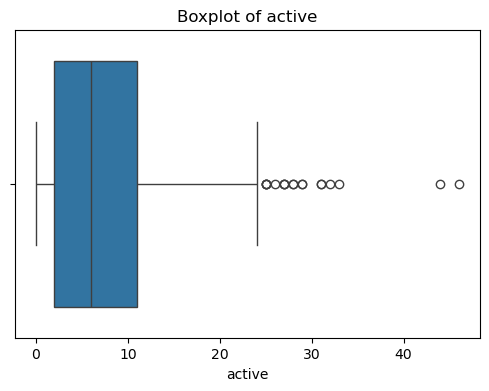

In [103]:
plt.figure(figsize = (6,4))
sns.boxplot(x=credit_card['active'])
plt.title("Boxplot of active")
plt.show()

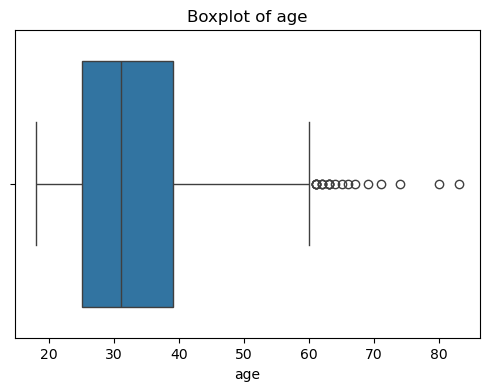

In [102]:
plt.figure(figsize = (6,4))
sns.boxplot(x=credit_card['age'])
plt.title("Boxplot of age")
plt.show()

In [ ]:
Q1 = credit_card['age'].quantile(0.25)
Q3 = credit_card['age'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


age_cleaned = credit_card[(credit_card['age'] >= 
lower_bound) & 
                            (credit_card['age'] <= 
upper_bound)]

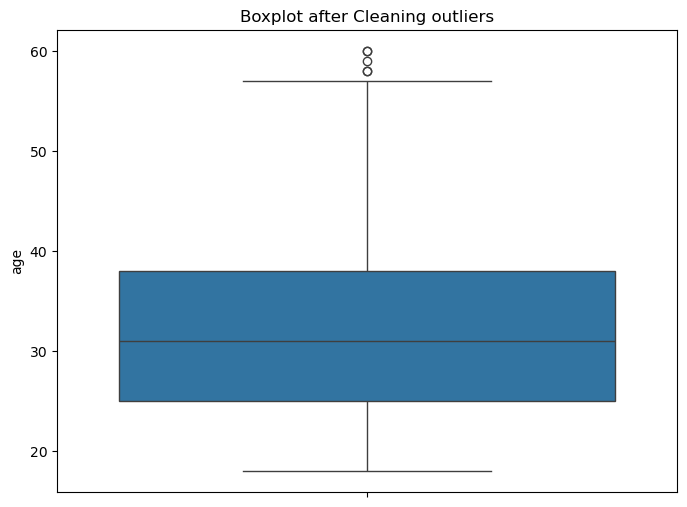

In [112]:
plt.figure(figsize=(8,6))
sns.boxplot(data=age_cleaned['age'])
plt.title('Boxplot after Cleaning outliers')
plt.show()

In [116]:
Q1 = credit_card['active'].quantile(0.25)
Q3 = credit_card['active'].quantile(0.75)
IQR = Q3 - Q1

In [117]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


active_cleaned = credit_card[(credit_card['active'] >= 
lower_bound) & 
                            (credit_card['active'] <= 
upper_bound)]

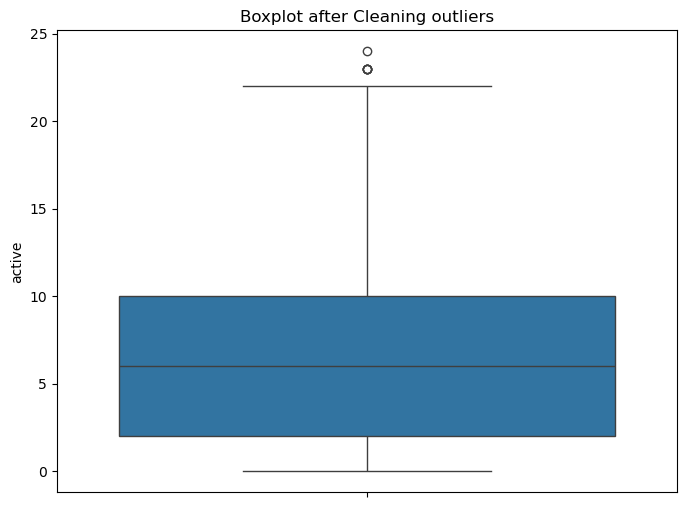

In [118]:
plt.figure(figsize=(8,6))
sns.boxplot(data=active_cleaned['active'])
plt.title('Boxplot after Cleaning outliers')
plt.show()

In [107]:
age = credit_card['age']
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = age[(age < lower_bound) | (age > upper_bound)]
clean_age = age[(age >= lower_bound) & (age <= upper_bound)]

print(f"Total records: {len(age)}")
print(f"outliers found: {len(outliers)}")
print(f"clean records: {len(clean_age)}")
print(f"outlier range: < {lower_bound:.2f} or > {upper_bound:.2f}")

Total records: 1319
outliers found: 21
clean records: 1298
outlier range: < 4.00 or > 60.00


In [108]:
active = credit_card['active']
Q1 = active.quantile(0.25)
Q3 = active.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = active[(active < lower_bound) | (active > upper_bound)]
clean_active = active[(active >= lower_bound) & (active <= upper_bound)]

print(f"Total records: {len(active)}")
print(f"outliers found: {len(outliers)}")
print(f"clean records: {len(clean_active)}")
print(f"outlier range: < {lower_bound:.2f} or > {upper_bound:.2f}")

Total records: 1319
outliers found: 18
clean records: 1301
outlier range: < -11.50 or > 24.50



--- Descriptive Statistics ---
        card      reports          age        income  share  expenditure  \
count   1319  1319.000000  1319.000000   1319.000000   1319  1319.000000   
unique     2          NaN          NaN           NaN    781          NaN   
top      yes          NaN          NaN           NaN  0.05%          NaN   
freq    1023          NaN          NaN           NaN     66          NaN   
mean     NaN     0.456406    32.938590   2933.282790    NaN   185.056952   
std      NaN     1.345267     9.859253   1767.204372    NaN   272.218910   
min      NaN     0.000000    18.000000      0.000000    NaN     0.000000   
25%      NaN     0.000000    25.000000   2000.000000    NaN     4.580000   
50%      NaN     0.000000    31.000000   2000.000000    NaN   101.300000   
75%      NaN     0.000000    39.000000   4000.000000    NaN   249.040000   
max      NaN    14.000000    83.000000  13000.000000    NaN  3099.500000   

       owner selfemp   dependents       months   majorc

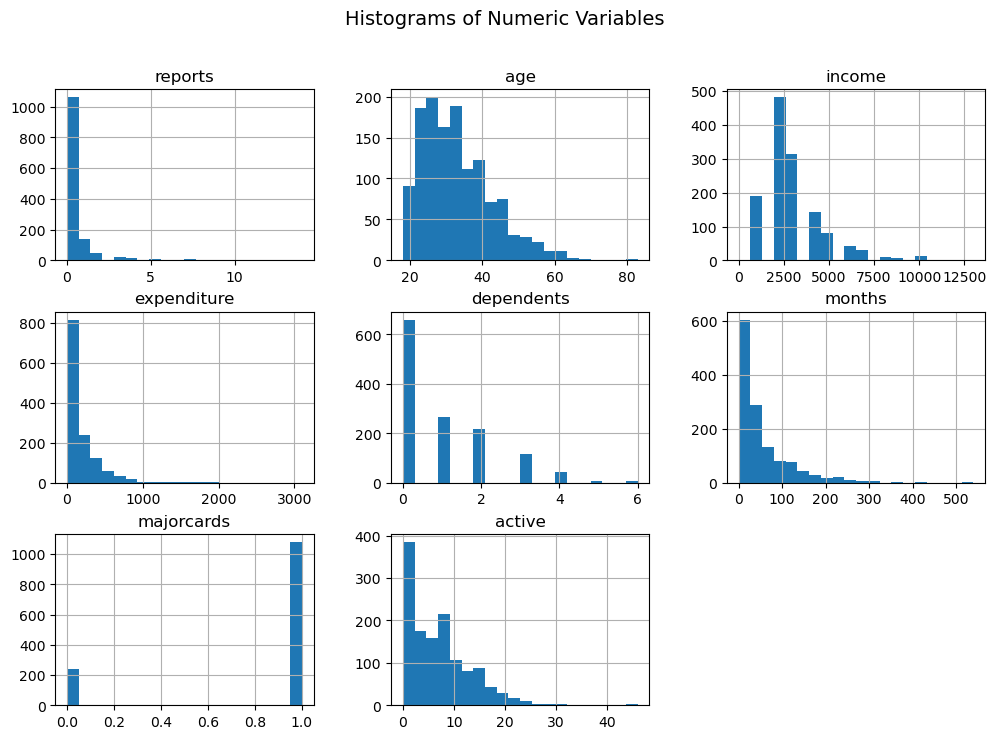

In [63]:
print("\n--- Descriptive Statistics ---")
print(credit_card.describe(include="all"))

# Histograms for numeric variables
credit_card.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Variables", fontsize=14)
plt.show()

- ##### Reports: Most customers have 0–1 credit reports → low delinquency.

- ##### Age: Distribution peaks at 25–40 years, tapering after 50.
- ##### Customer base is young to mid-aged working professionals.

- ##### Income: Positively skewed, most between 2–5 units, few high earners.

- ##### Expenditure: Very low for majority; few extreme outliers (~3000).
- ##### Most customers are conservative spenders.

- ##### Dependents: Majority have 0–2 dependents; very few with 4+.

- ##### Months (relationship length): Most customers are new/short-term (under 50 months).

- ##### MajorCards: Almost everyone has 1 card; very few with more.

- ##### Active: Most are minimally active (0–1); small segment is highly active.

- ##### Card_bin: Similar to expenditure, shows skewed distribution → few very high users.

- ##### Overall Insight:
- ##### The dataset shows a financially stable, salaried, young customer base, with low risk behavior (few credit issues, low expenditure, few dependents).

In [64]:
#descriptive statistics
print(credit_card.describe())
print(credit_card['owner'].value_counts())

           reports          age        income  expenditure   dependents  \
count  1319.000000  1319.000000   1319.000000  1319.000000  1319.000000   
mean      0.456406    32.938590   2933.282790   185.056952     0.993935   
std       1.345267     9.859253   1767.204372   272.218910     1.247745   
min       0.000000    18.000000      0.000000     0.000000     0.000000   
25%       0.000000    25.000000   2000.000000     4.580000     0.000000   
50%       0.000000    31.000000   2000.000000   101.300000     1.000000   
75%       0.000000    39.000000   4000.000000   249.040000     2.000000   
max      14.000000    83.000000  13000.000000  3099.500000     6.000000   

            months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  
mean     55.267627     0.817286     6.996967  
std      66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000  
25%      12.000000     1.000000     2.000000  
50%      30.000000     1.000000     6.0000

In [65]:
#T-test (dependant) to compare income by 'owner' (categorical with two groups)
owner_groups = credit_card.groupby('owner')['income']
group1 = owner_groups.get_group('yes')
group2 = owner_groups.get_group('no')
t_stat, p_value = stats.ttest_ind(group1,group2)
print(f'T-test for income by owner: t={t_stat}, p={p_value}')

T-test for income by owner: t=12.427689911143263, p=1.306436600375572e-33


#### insights
- ##### we compared income of people who own vs don't own (a credit card / property depending on dataset)
- ##### since p-value < 0.05 the difference is real and significant, not random
- ##### ownership is strongly linked with income levels

In [66]:
#chi- square test between 'owner' and 'active' (both categorical)
contingency_table = pd.crosstab(credit_card['owner'], credit_card['active'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'chi-square test: chi2={chi2}, p={p}')

chi-square test: chi2=133.02296462744454, p=1.1942024894281474e-13


#### insights
- ##### There is significant relationship between being an owner and being active
- ##### The very small p-value shows that this relationship is not due to chance
- ##### owners are more likely to be active , and activity is not independent of ownership

In [70]:
#  Hypothesis Testing
#  Income significantly predicts expenditure
slope, intercept, r_value, p_value, std_err = stats.linregress(credit_card['income'], credit_card['expenditure'])
print("\n--- Hypothesis Test: Income vs Expenditure ---")
print(f"R-squared: {r_value**2:.3f}, p-value: {p_value:.3f}")


--- Hypothesis Test: Income vs Expenditure ---
R-squared: 0.077, p-value: 0.000


#### insights
- ##### income and expenditure are positively realted 
- ##### the effect is statistically significant
- ##### As income explains only small part of expenditure , meaning other factors also influence spending

In [71]:
print(credit_card['active'].unique())

[12 13  5  7  1  3  6 18 20  0 22  8 10  2 17 19 15 16 14  4 11  9 29 27
 26 21 23 46 25 31 28 24 33 32 44]


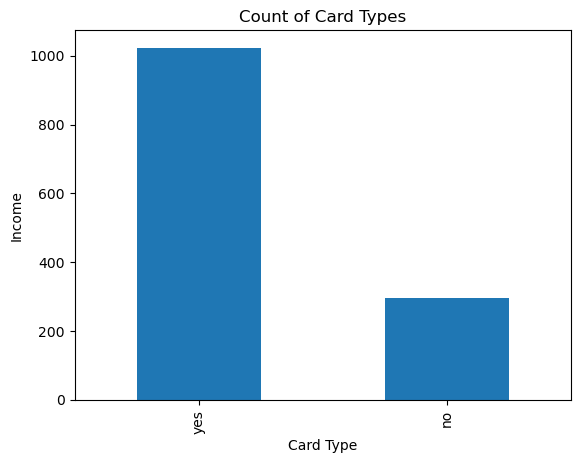

In [72]:
credit_card['card'].value_counts().plot(kind='bar')
plt.title('Count of Card Types')
plt.xlabel('Card Type')
plt.ylabel('Income')
plt.show()

#### insights
- ##### income is higher for cardholders - people with credit cards contribute a much larger share of income compared to non card holders
- ##### a small proportion of people don't own cards , and their income contribution is also much smaller

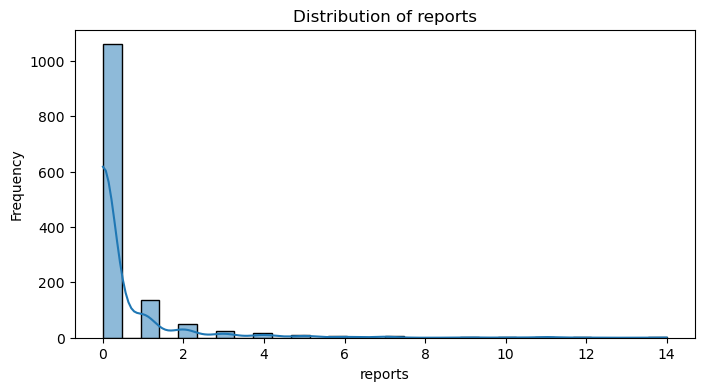

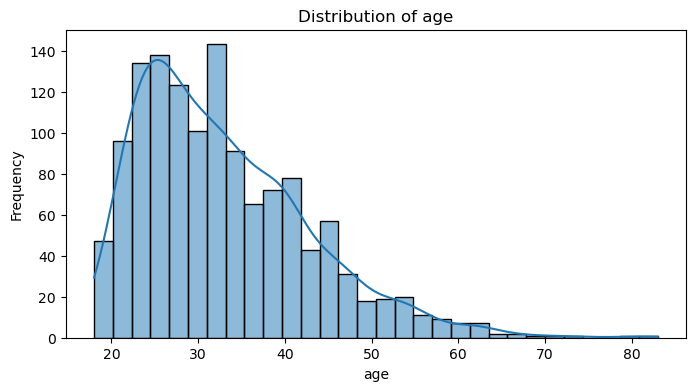

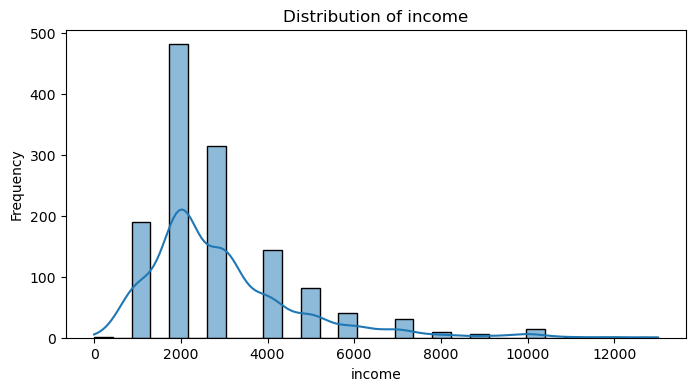

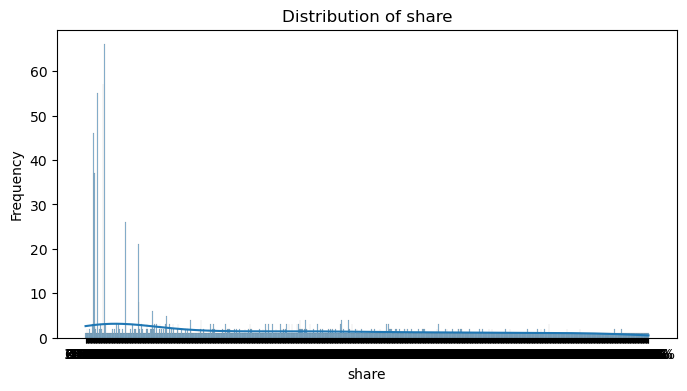

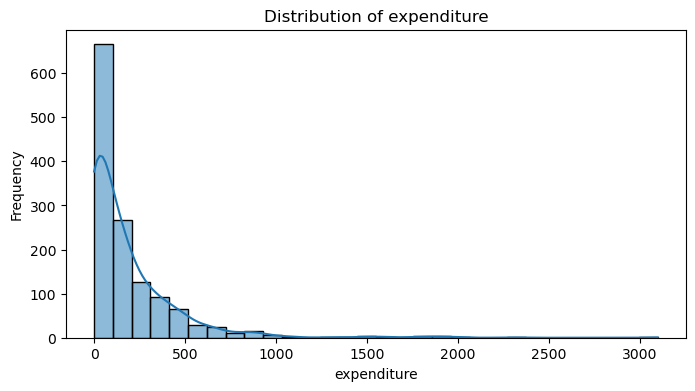

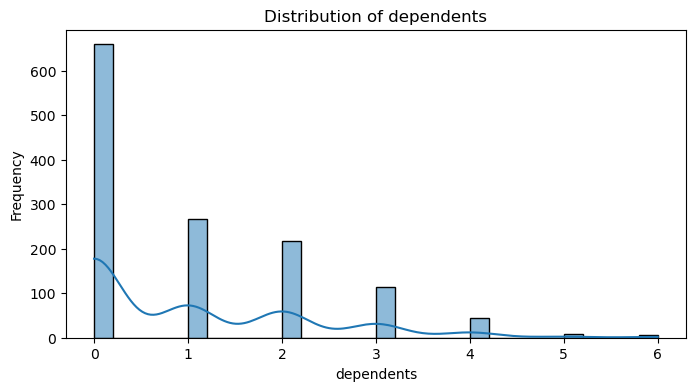

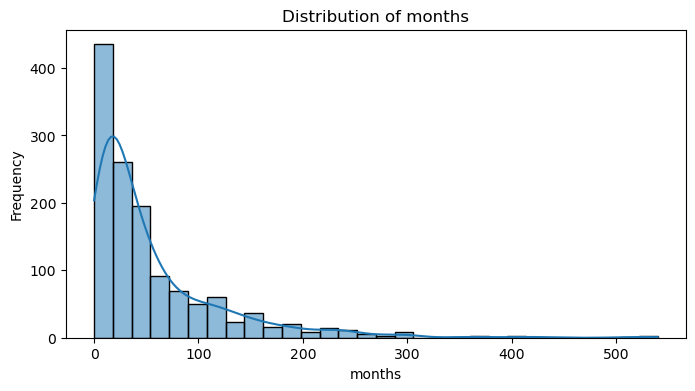

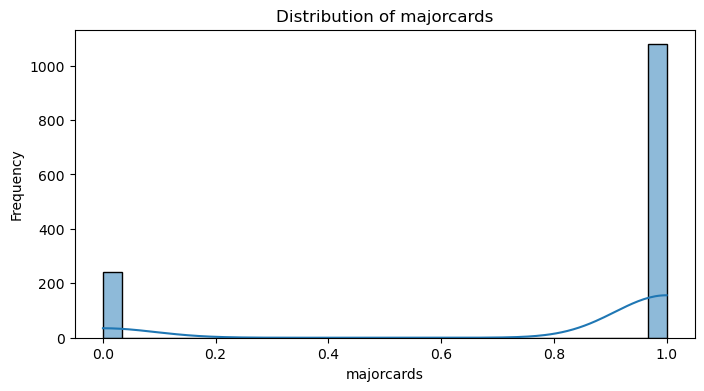

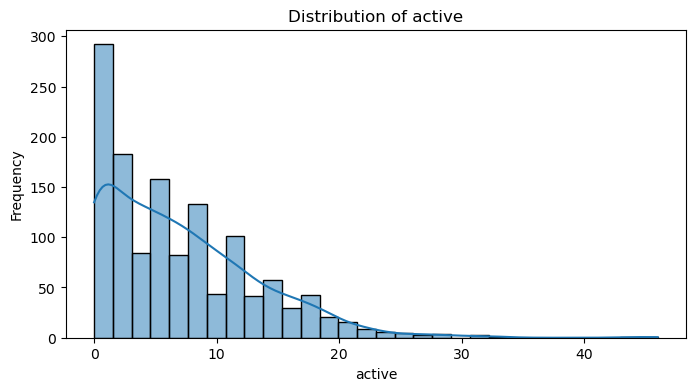

In [73]:
numeric_cols=['reports','age','income','share','expenditure','dependents', 'months','majorcards','active']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(credit_card[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    

    plt.show()

#### Insights
- ##### •	The dataset seems to represent a young population with mostly low income, but a small portion earns significantly higher.
- ##### •	Both age and income distributions are right – skewed , though age is more naturally spread while income is highly concentrated at the lower end
- ##### •	This could imply that younger individuals dominate the dataset and higher income levels are rare (possibly older,more experienced individuals)


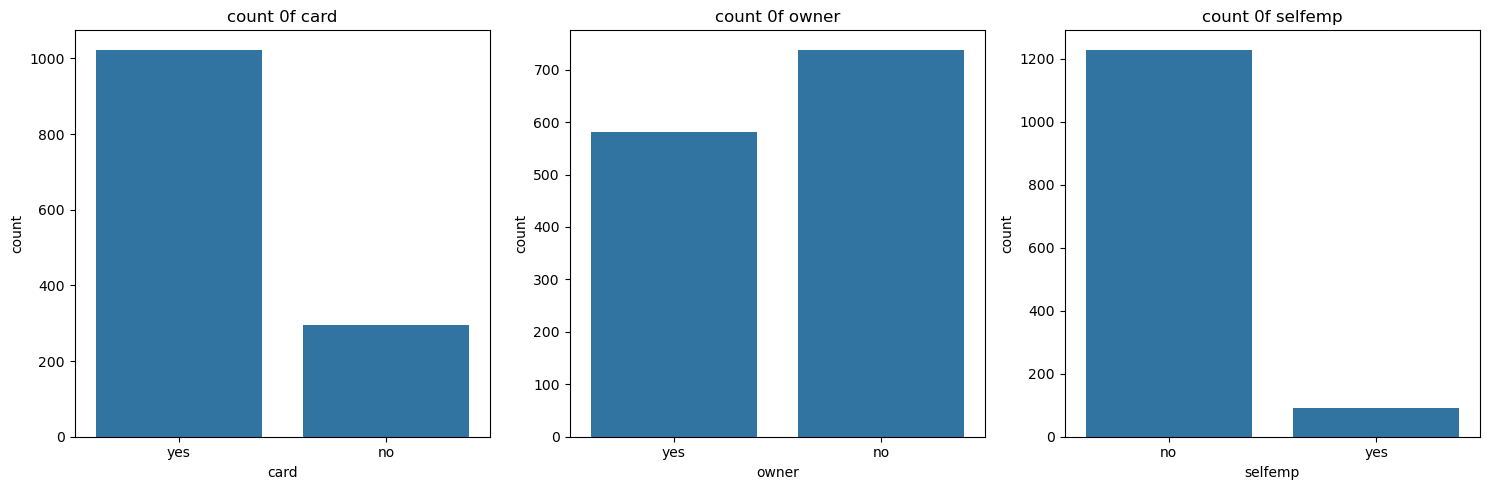

In [74]:
categorical_cols = ['card','owner','selfemp']
plt.figure(figsize=(15,5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1,3,i)
    sns.countplot(x=col, data=credit_card )
    plt.title(f'count 0f {col}')
plt.tight_layout()
plt.show()
                    

- ##### 1.Cardholders: Majority (~1000+) have a card vs ~300 who don’t.
 - ##### Insight: Card penetration is high, suggesting the institution’s products are widely adopted.

- ##### 2.Owners: Slightly more non-owners (~740) than owners (~580).
- ##### Insight: Customer base is mixed, but home/renters slightly dominate.

- ##### 3.Self-employed: Very few (less than 100) compared to salaried (~1200).
 - ##### Insight: Customers are primarily salaried, giving more financial stability.

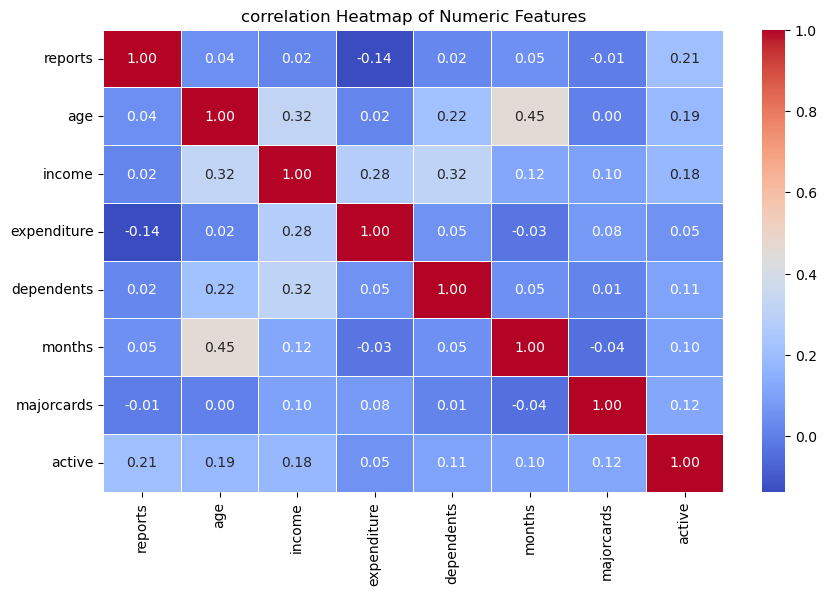

In [75]:
numeric_df = credit_card.select_dtypes(include="number")
corr= numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f",
linewidths = 0.5)
plt.title("correlation Heatmap of Numeric Features")
plt.show()


#### Insights
- ##### •	Demographics influence income- Age and number of dependents show moderate positive correlation with income, meaning older individuals with dependents generally earn more
- ##### •	Expenditure is not income driven – income and expenditure have only a weak correlation, suggesting that spending patterns depend more on behavior (eg.,, card usage ) than on income level
- ##### •	Risk signals matter – more reports are linked to lower account activity, indicating that negative financial history reduces customer engagaement


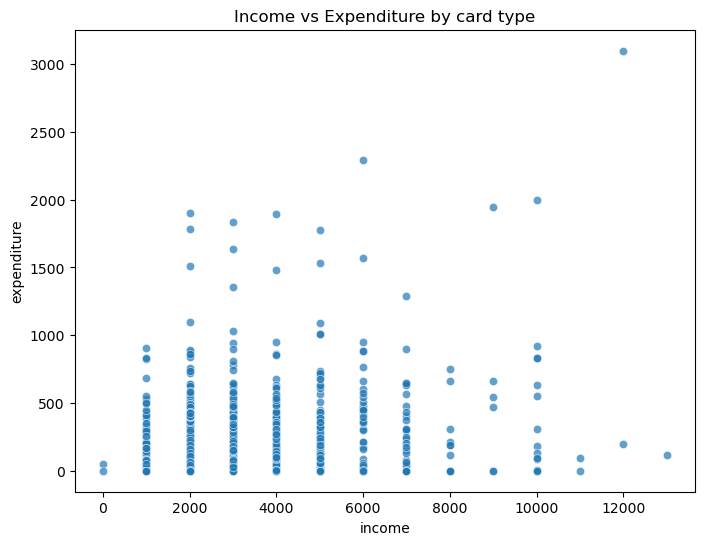

In [104]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='income',y='expenditure', data=credit_card, alpha=0.7)
plt.title("Income vs Expenditure by card type")
plt.show()

#### Insights
- ##### •	Card holders spent significantly more – people with cards show much higher and more varied expenditure compared to non-cardholders, who mostly remain at very low spending levels
- ##### •	Income alone doesn’t explain expenditure – Higher income without a card doesn’t lead to higher spending , while even lower-income cardholders can spend more
- ##### •	Cards enable discretionary spending – Having a cardappaers to unlock the potential for higher expenditure,making card ownership a key driver od spending behaviuor. 


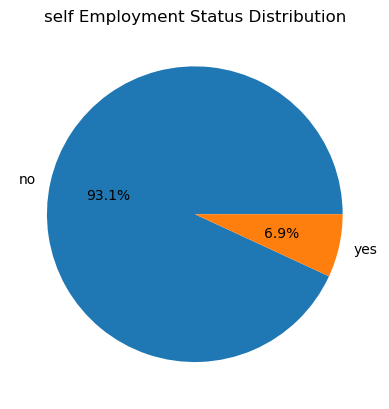

In [77]:
credit_card['selfemp'].value_counts().plot(kind='pie' , autopct='%1.1f%%')
plt.title('self Employment Status Distribution')
plt.ylabel('')
plt.show()

#### insights
- ##### * 93.1% are not self-employed, only 6.9% are self-employed.
- ##### * Reinforces earlier finding — customer base is largely salaried employees, reducing risk for lenders.

#### Overall insights
- #### 1 . Age Distribution
- ##### •	Most customers are between 20–40 years old, with the peak around 25–30 years.
- ##### •	Few customers are above 60, indicating the customer base is relatively young.
________________________________________
- ##### 2. Income Distribution
- ##### •	Income is right-skewed, with most people earning between 2–5 units.
- ##### •	A small group has very high income (up to 12+), but they are outliers.
________________________________________
 #### 3. Card Ownership
- ##### •	Majority of customers own a card (more than 1000 vs ~300 without).
- ##### •	This suggests the dataset is cardholder-heavy.
________________________________________
 #### 4. Ownership & Employment
- ##### •	Around 55% are not house owners, while 45% own houses.
- ##### •	Self-employment is very rare (only ~7%), while most customers are salaried.
________________________________________
#### 5. Income vs Expenditure by Card Type
- ##### •	Customers with cards generally have higher expenditure compared to those without cards.
- ##### •	Those without cards show very low expenditure, clustered near zero.
- ##### •	Some cardholders with higher incomes spend significantly more (visible outliers above 2000).
________________________________________
 #### 6. Correlation Heatmap
- ##### •	Age is moderately correlated with months (0.44) → older customers tend to have longer account history.
- ##### •	Income and expenditure (0.28) show a positive relation → higher income leads to higher spending.
- ##### •	Dependents and income (0.32) also show correlation → more dependents often means higher income.
- ##### •	Most other correlations are weak (< 0.2), meaning features are not strongly dependent.
________________________________________
#### 7. Histograms of Numeric Variables
- ##### •	Reports (credit reports): Most people have 0–1 reports, very few above 5.
- ##### •	Dependents: Majority have 0–2 dependents.
- ##### •	Months (relationship length): Skewed — most customers are new (<50 months).
- ##### •	Expenditure: Majority spend under 500, with rare big spenders up to 3000.
- ##### •	Major cards: Almost all customers have 1 major card, very few with more.
- ##### •	Active accounts: Most have 0–2 active accounts.
________________________________________
#### 8. Overall Insights
- ##### •	Customer base is young, salaried, and mostly cardholders.
- ##### •	Spending is linked to having a card and income levels.
- ##### •	A small fraction of high-income customers are outliers, spending significantly more.
- ##### •	Most people are financially conservative: low expenditure, few dependents, and limited credit reports.
